In [1]:
import torch
from torch import nn
from PIL import Image
import torchvision
import sys
sys.path.append('./utils')
from useful_func import *

In [80]:
def corr2d(x,k):
    h,w=k.shape
    result_h=x.shape[0]-h+1
    result_w=x.shape[1]-w+1
    result=torch.zeros((result_h,result_w))
    for i in range(result_h):
        for j in range(result_w):
            result[i,j]=(x[i:i+h,j:j+w]*k).sum()
    return result
class Conv2D(nn.Module):
    def __init__(self):
        super(Conv2D, self).__init__()
        self.bias=nn.Parameter(torch.zeros(1))
    def forward(self, x,k):
        r=corr2d(x,k)
        return r+self.bias

In [81]:
def show_image_from_tensor(x):
    if isinstance(x, torch.Tensor):
        x=x.numpy()*255
    Image.fromarray(x).show()

In [82]:
x=torch.ones([60,80])
x[:,20:60]=0
k=torch.tensor([[1,-1]])
Y=corr2d(x,k)

In [83]:
conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)
x=x.reshape(1,1,60,80)
Y=Y.reshape(1,1,60,79)

In [84]:
print(Y)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


In [85]:
loss=nn.MSELoss()
for i in range(10000):
    # conv2d.zero_grad()
    loss.zero_grad()
    Y_hat=conv2d(x)
    l=loss(Y_hat,Y)
    l.backward()

    conv2d.weight.data[:]-=0.01*conv2d.weight.grad

In [86]:
conv2d.weight.data

tensor([[[[ 1.3902, -1.0642]]]])

### 卷积神经网络超参数

填充和步幅

In [87]:
def com_conv2d(conv2d,x):
    x=x.reshape((1,1)+x.shape)
    y=conv2d(x)
    return y

conv2d=nn.Conv2d(1,1,kernel_size=(3,3),padding=(1,1),bias=False)

In [88]:
x=torch.ones([6,6])

In [89]:
com_conv2d(conv2d,x).shape

torch.Size([1, 1, 6, 6])

通道数

In [1]:
import torch
from torch import nn
from PIL import Image
import torchvision
import sys
sys.path.append('./utils')
from dplearning_second_part.limu_dplearning.utils.useful_func import *

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.sequential =nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=2),nn.Sigmoid()
            ,nn.AvgPool2d(kernel_size=2,stride=2)
            ,nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),nn.Sigmoid()
            ,nn.AvgPool2d(kernel_size=2,stride=2),nn.Flatten()
            ,nn.Linear(in_features=16*5*5,out_features=120),nn.Sigmoid()
            ,nn.Linear(in_features=120,out_features=84),nn.Sigmoid()
            ,nn.Linear(in_features=84,out_features=10)
        )
    def forward(self, x):
        return self.sequential(x)

In [3]:
x=torch.ones([1,1,28,28],dtype=torch.float32)
net=LeNet()
###看下输出的形状
for layer in net.sequential:
    x=layer(x)
    print(layer.__class__.__name__,'_____output shape:\t',x.shape)

Conv2d _____output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid _____output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d _____output shape:	 torch.Size([1, 6, 14, 14])
Conv2d _____output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid _____output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d _____output shape:	 torch.Size([1, 16, 5, 5])
Flatten _____output shape:	 torch.Size([1, 400])
Linear _____output shape:	 torch.Size([1, 120])
Sigmoid _____output shape:	 torch.Size([1, 120])
Linear _____output shape:	 torch.Size([1, 84])
Sigmoid _____output shape:	 torch.Size([1, 84])
Linear _____output shape:	 torch.Size([1, 10])


In [4]:
train_data=torchvision.datasets.FashionMNIST('../data', train=True, download=True,transform=torchvision.transforms.ToTensor())
test_data=torchvision.datasets.FashionMNIST('../data', train=False, download=True,transform=torchvision.transforms.ToTensor())

In [5]:
batch_size=256
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [6]:
def evaluate_accuracy_gpu(net,data_iter,device=None):
    if isinstance(net,nn.Module):
        net.eval()
        if not device:
            device = torch.device("cuda:0")
    metric=Accumulator(2)
    for x,y in data_iter:
        if isinstance(x,list):
            x=[i.to(device) for i in x]
        else:
            x=x.to(device)
        y=y.to(device)
        metric.add(accuracy(net(x),y),y.numel())
    return metric[0]/metric[1]    

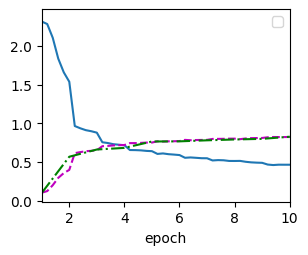

loss 0.466, train acc 0.824, test acc 0.828
18226.4 examples/sec on cpu


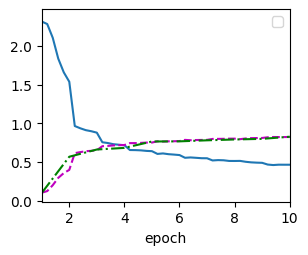

In [7]:


lr, num_epochs = 0.9, 10
train_ch6(net, train_loader, test_loader, num_epochs, lr, try_gpu())

In [ ]:
train_ch6

In [ ]:
nn.Conv2d()